<a href="https://colab.research.google.com/github/vitthal-bhandari/Homophobia-Transphobia-Detection/blob/master/lt_edi_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check GPU and Memory Usage

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/eng_3_train.tsv', delimiter='\t') 
df=df[["text", "category"]]
df = df.dropna()
df

,text,category
0,"I support her, very smart ponnu",Non-anti-LGBT+ content
1,priyadharshini kannan same gender attraction ...,Homophobic
2,Bro u name and phone number (or)mobile number ...,Non-anti-LGBT+ content
3,experience Thaks bro I love you so much bro,Non-anti-LGBT+ content
4,world is becoming bad day by day....,Non-anti-LGBT+ content
...,...,...
3159,That Akka is really good soul,Non-anti-LGBT+ content
3160,Good madam.if i get any oppertunity in future ...,Non-anti-LGBT+ content
3161,judgment is based on scientific facts,Non-anti-LGBT+ content
3162,Respect to allll🙏🙏🙏,Non-anti-LGBT+ content


In [3]:

df_dev=pd.read_csv('/content/eng_3_dev.tsv', delimiter='\t') 
df_dev=df_dev[["text", "category"]]
df_dev = df_dev.dropna()
df_dev

,text,category
0,Govt must appoint a thiru nangai police to arr...,Homophobic
1,Archana Shree what,Non-anti-LGBT+ content
2,they probably dont want to live in your devan'...,Non-anti-LGBT+ content
3,Haha she is so cute and innocent,Non-anti-LGBT+ content
4,I love it 💗💗💗,Non-anti-LGBT+ content
...,...,...
787,"Hi ma, I am a mother of 2 kids ma, I support H...",Non-anti-LGBT+ content
788,Behavior is very cheaper. Recently I travelled...,Non-anti-LGBT+ content
789,Boomi Raja then u should never watch this my d...,Non-anti-LGBT+ content
790,Fables movie mind blowing,Non-anti-LGBT+ content


In [4]:

df_test=pd.read_csv('/content/eng_3_test.tsv', delimiter='\t') 
df_test = df_test.dropna()
df_test

,category,text
0,Non-anti-LGBT+ content,Spr....2016 poitan feel happy with my partner ...
1,Non-anti-LGBT+ content,R u still with ur partner
2,Non-anti-LGBT+ content,excellent movie..no unnecessary drama or scene...
3,Non-anti-LGBT+ content,"For those who speak about culture., pre marita..."
4,Non-anti-LGBT+ content,Best movie and people not understand relations...
...,...,...
985,Non-anti-LGBT+ content,Looks like Karthik took advantage on Varun whe...
986,Non-anti-LGBT+ content,i am really crying pro😢😢😢😭😭😭😭😭😭 ...
987,Non-anti-LGBT+ content,They may be transgender but don't ever forgot ...
988,Non-anti-LGBT+ content,It is their own choice. I support them No doub...


Create dataframe

In [5]:

df['category'] = df['category'].replace('Non-anti-LGBT+ content', 'ally')
df_dev['category'] = df_dev['category'].replace('Non-anti-LGBT+ content', 'ally')

In [6]:
#learning the distribution of comments
print(df['category'].value_counts())
print(df_dev['category'].value_counts())

ally           2999
Homophobic      157
Transphobic       6
Name: category, dtype: int64
ally           731
Homophobic      58
Transphobic      2
Name: category, dtype: int64


In [7]:
df['category'] = df['category'].replace('ally', 0)
df_dev['category'] = df_dev['category'].replace('ally', 0)
df['category'] = df['category'].replace('Homophobic', 1)
df_dev['category'] = df_dev['category'].replace('Homophobic', 1)
df['category'] = df['category'].replace('Transphobic', 2)
df_dev['category'] = df_dev['category'].replace('Transphobic', 2)

In [8]:
df_dev

,text,category
0,Govt must appoint a thiru nangai police to arr...,1
1,Archana Shree what,0
2,they probably dont want to live in your devan'...,0
3,Haha she is so cute and innocent,0
4,I love it 💗💗💗,0
...,...,...
787,"Hi ma, I am a mother of 2 kids ma, I support H...",0
788,Behavior is very cheaper. Recently I travelled...,0
789,Boomi Raja then u should never watch this my d...,0
790,Fables movie mind blowing,0


**English**

|             | Train (3164)  | Dev (792)    | Test (990)   | Total (4946) |
|-------------|---------------|--------------|--------------|--------------|
| Ally        | 3001 (94.84%) | 732 (92.42%) | 924 (93.33%) | 4657         |
| Homophobic  | 157 (4.96%)   | 58 (7.32%)   | 61 (6.16%)   | 276          |
| Transphobic | 6 (0.2%)      | 2 (0.25%)    | 5 (0.5%)     | 13           |


---

**Tamil**

|             | Train (2662)  | Dev (666)    | Test (833)   | Total (4161) |
|-------------|---------------|--------------|--------------|--------------|
| Ally        | 2022 (75.99%) | 526 (78.97%) | 657 (78.87%) | 3205         |
| Homophobic  | 485 (18.22%)   | 103 (15.46%)  | 135 (16.20%)  | 723          |
| Transphobic | 155 (5.8%)    | 37 (5.55%)   | 41 (4.92%)    | 233           |

Normalizing and Vectorizing the data

# BERT

## Tokenization and normalization with BERT

In [9]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.9 MB/s eta 0:00:00


In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
     

In [11]:
from transformers import BertTokenizer
bert_name='bert-base-cased'
tokenizer=BertTokenizer.from_pretrained(bert_name, 
                                        add_special_tokens=True, 
                                        do_lower_case=False, 
                                        max_length=20,
                                        pad_to_max_length=True)

In [ ]:
def bert_encoder(review):
  encoded=tokenizer.encode_plus(review, add_special_tokens=True,
                                max_length=20, pad_to_max_length=True,
                                truncation=True,
                                return_attention_mask=True,
                                return_token_type_ids=True)
  return encoded['input_ids'], encoded['token_type_ids'], encoded['attention_mask']

In [ ]:
bert_train=[]
for i, sequence in enumerate(df['text']):
  bert_train.append( bert_encoder(sequence) )

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
bert_lbl=[]
for i, sequence in enumerate(df['category']):
  bert_lbl.append( sequence )

In [ ]:
bert_train=np.array(bert_train)
bert_lbl=tf.keras.utils.to_categorical(bert_lbl, num_classes=3)

In [ ]:
bert_val=[]
for i, sequence in enumerate(df_dev['text']):
  bert_val.append( bert_encoder(sequence) )

In [ ]:
bert_val_lbl=[]
for i, sequence in enumerate(df_dev['category']):
  bert_val_lbl.append( sequence )

In [ ]:
bert_val=np.array(bert_val)
bert_val_lbl=tf.keras.utils.to_categorical(bert_val_lbl, num_classes=3)

In [ ]:
print(bert_train.shape, bert_lbl.shape)

(3162, 3, 20) (3162, 3)


In [ ]:
tr_reviews, tr_segments, tr_masks=np.split(bert_train, 3, axis=1)
val_reviews, val_segments, val_masks=np.split(bert_val, 3, axis=1)

In [ ]:
tr_reviews=tr_reviews.squeeze()
tr_segments=tr_segments.squeeze()
tr_masks=tr_masks.squeeze()
val_reviews=val_reviews.squeeze()
val_segments=val_segments.squeeze()
val_masks=val_masks.squeeze()

In [ ]:
def example_to_features(input_ids, attention_masks, token_type_ids, y):
  return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids}, y

train_ds=tf.data.Dataset.from_tensor_slices((tr_reviews, tr_masks, tr_segments, bert_lbl)).map(example_to_features).shuffle(100).batch(32)

valid_ds=tf.data.Dataset.from_tensor_slices((val_reviews, val_masks, val_segments, bert_val_lbl)).map(example_to_features).shuffle(100).batch(32)

## Custom model with BERT

In [ ]:
from transformers import TFBertModel
bert_name='bert-base-cased'
bert=TFBertModel.from_pretrained(bert_name)
bert.summary()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
max_seq_len=20
inp_ids=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="input_ids")
att_mask=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="attention_mask")
seq_ids=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="token_type_ids")


In [ ]:
train_ds.element_spec

({'input_ids': TensorSpec(shape=(None, 20), dtype=tf.int64, name=None),
  'attention_mask': TensorSpec(shape=(None, 20), dtype=tf.int64, name=None),
  'token_type_ids': TensorSpec(shape=(None, 20), dtype=tf.int64, name=None)},
 TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))

In [ ]:
inp_dict={
    "input_ids":inp_ids,
    "attention_mask":att_mask,
    "token_type_ids":seq_ids
}
outputs=bert(inp_dict)

outputs

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<KerasTensor: shape=(None, 20, 768) dtype=float32 (created by layer 'tf_bert_model')>, pooler_output=<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model')>, past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)

In [ ]:
x=tf.keras.layers.Dropout(0.5)(outputs[1])
x=tf.keras.layers.Dense(200, activation='relu')(x)
x=tf.keras.layers.Dropout(0.25)(x)
y=tf.keras.layers.Dense(3, activation='softmax')(x)
custom_model=tf.keras.models.Model(inputs=inp_dict, outputs=y)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5)
loss=tf.keras.losses.CategoricalCrossentropy()
custom_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
custom_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 20)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 20)]         0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 20)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]',          

In [ ]:
history=custom_model.fit(train_ds, epochs=7, validation_data=valid_ds)

Epoch 1/7


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

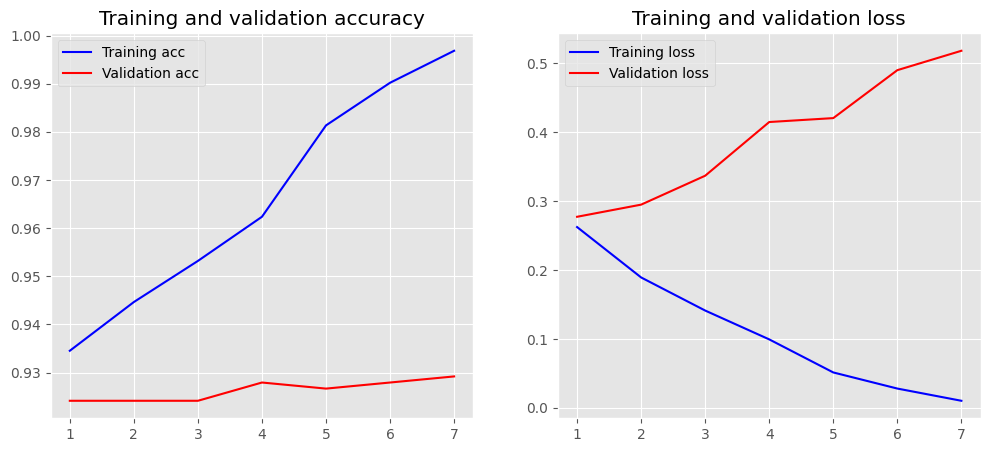

In [ ]:
plot_history(history)

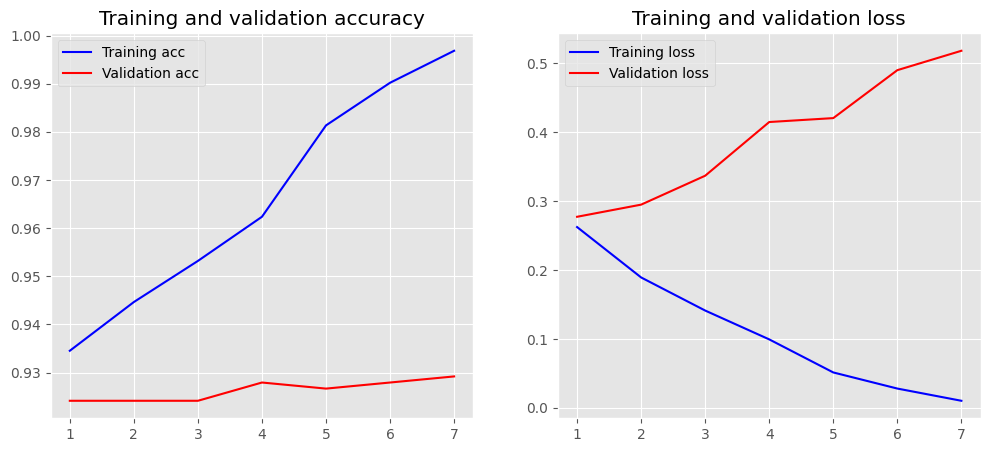

In [ ]:
plot_history(history)

In [ ]:
valid_pred=(custom_model.predict(valid_ds) > 0.5).astype("float32")

25/25 [==============================] - 5s 59ms/step


In [ ]:
tf.math.confusion_matrix(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[702,  29,   0],
       [ 57,   1,   0],
       [  2,   0,   0]], dtype=int32)>

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa
metric = tfa.metrics.F1Score(num_classes=3, average='weighted')
metric.update_state(bert_val_lbl, valid_pred)
result = metric.result()
result.numpy()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 KB 19.1 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


0.8713058

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['ally', 'homophobic', 'transphobic']

In [ ]:
print(classification_report(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1), target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.96      0.94       731
  homophobic       0.03      0.02      0.02        58
 transphobic       0.00      0.00      0.00         2

    accuracy                           0.89       791
   macro avg       0.32      0.33      0.32       791
weighted avg       0.85      0.89      0.87       791



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# EDA

In [12]:
import nltk

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
!git clone https://github.com/jasonwei20/eda_nlp.git

Cloning into 'eda_nlp'...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 396 (delta 45), reused 44 (delta 44), pack-reused 336
Receiving objects: 100% (396/396), 20.40 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [15]:
%cd eda_nlp/code

/content/eda_nlp/code


In [16]:
!ls

augment.py  eda.py  __pycache__


## Run EDA on homophobic sentences

In [17]:
df_homophobic=df[df.category == 1]
df_homophobic.head

<bound method NDFrame.head of                                                    text  category
1     priyadharshini kannan  same gender attraction ...         1
22    Really excellent movie....I feel that no one a...         1
31                                    Madam read bible          1
94    it's due to abnormalities present sexual dimor...         1
96    i think u too gay....thats y u telling  with t...         1
...                                                 ...       ...
2971  Even Dogs know its pair.. It might not  be wit...         1
2974  They are bastards morning 4 o clock they are s...         1
3026                           Its not good 👆👎👎👎👎👎👎👎😏😑😣         1
3038  Human being is going to destroyed LPGT. This i...         1
3060  anu lavanya  it seems that some people likely ...         1

[157 rows x 2 columns]>

In [18]:
df_homophobic.iloc[:, [0, 1]] = df_homophobic.iloc[:, [1, 0]]
df_homophobic = df_homophobic.rename(columns={'text': 'category', 'category': 'text'})

<ipython-input-18-e24ef182fae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_homophobic.iloc[:, [0, 1]] = df_homophobic.iloc[:, [1, 0]]


In [19]:
df_homophobic.head(1000)

,category,text
1,1,priyadharshini kannan same gender attraction ...
22,1,Really excellent movie....I feel that no one a...
31,1,Madam read bible
94,1,it's due to abnormalities present sexual dimor...
96,1,i think u too gay....thats y u telling with t...
...,...,...
2971,1,Even Dogs know its pair.. It might not be wit...
2974,1,They are bastards morning 4 o clock they are s...
3026,1,Its not good 👆👎👎👎👎👎👎👎😏😑😣
3038,1,Human being is going to destroyed LPGT. This i...


In [20]:
df_homophobic.to_csv('homophobic.txt', sep="\t", header=False, index=False)

In [21]:
! python augment.py --input=homophobic.txt --num_aug=16

/content/eda_nlp/code/eda.py:177: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not '']
generated augmented sentences with eda for homophobic.txt to eda_homophobic.txt with num_aug=16


## Run EDA on transphobic sentences

In [22]:
df_transphobic=df[df.category == 2]
df_transphobic.head

<bound method NDFrame.head of                                                    text  category
401                                          Sex the 9.         2
1090  Magalakshmi Mukunthan Ella transgalayum konnud...         2
1340  Today also one transgender scolded me for not ...         2
1418  Rajeswari Rajagopalan ; Sister....last week fo...         2
2331      Hey seriously I thought She was a Transgender         2
2766  Every transenter says they are doing prostitui...         2>

In [23]:
df_transphobic.iloc[:, [0, 1]] = df_transphobic.iloc[:, [1, 0]]
df_transphobic = df_transphobic.rename(columns={'text': 'category', 'category': 'text'})

<ipython-input-23-090ea6284041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transphobic.iloc[:, [0, 1]] = df_transphobic.iloc[:, [1, 0]]


In [24]:
df_transphobic.to_csv('transphobic.txt', sep="\t", header=False, index=False)

In [25]:
! python augment.py --input=transphobic.txt --num_aug=32

generated augmented sentences with eda for transphobic.txt to eda_transphobic.txt with num_aug=32


## Combine augmented sentences with original dataframe

In [26]:
!ls

augment.py	    eda.py		 homophobic.txt  transphobic.txt
eda_homophobic.txt  eda_transphobic.txt  __pycache__


In [27]:
df_homophobic_aug=pd.read_csv('eda_homophobic.txt', sep="\t", names=["category", "text"])
df_transphobic_aug=pd.read_csv('eda_transphobic.txt', sep="\t", names=["category", "text"])

In [28]:
df_homophobic_aug.head

<bound method NDFrame.head of       category                                               text
0            1  with kannan same gender attraction with sex fi...
1            1  priyadharshini kannan same gender attraction w...
2            1  priyadharshini kannan gender attraction with s...
3            1  buddy priyadharshini kannan same gender attrac...
4            1  priyadharshini sex same gender attraction an s...
...        ...                                                ...
2664         1  anu lavanya it seem that some people likely to...
2665         1  anu others mindset wife that there people lava...
2666         1  anu lavanya it seems that some people likely t...
2667         1  anu lavanya it seems that some people likely t...
2668         1  anu lavanya it seems that some people likely t...

[2669 rows x 2 columns]>

In [29]:
df_transphobic_aug.head

<bound method NDFrame.head of      category                                               text
0           2                                            the sex
1           2                                         gender the
2           2                                sexual urge sex the
3           2                                            the sex
4           2                                            the sex
..        ...                                                ...
193         2  every transenter says they are doing prostitui...
194         2  every transenter says they are doing prostitui...
195         2  every transenter says they are doing prostitui...
196         2  every transenter says they are doing prostitui...
197         2  every transenter says they are doing prostitui...

[198 rows x 2 columns]>

In [30]:
df_homophobic_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2669 non-null   int64 
 1   text      2669 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.8+ KB


In [31]:
df_transphobic_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  198 non-null    int64 
 1   text      198 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [32]:
# get dataframe for ally class since we need to reduce size of this class
df_ally=df[df.category == 0]
df_ally['category'].value_counts()

0    2999
Name: category, dtype: int64

In [33]:
df_ally_shuffled=df_ally.sample(frac=1)
df_ally_shuffled_subset=df_ally_shuffled.iloc[:1500]

In [ ]:
df_ally_shuffled_subset.head

<bound method NDFrame.head of                                                    text  category
2277  Royal Queen  Its not like just bcoz you are a ...         0
385                                 Stay home,stay safe         0
858                Great Interview Dhanush style speech         0
407   kias info channel  praise God. Jesus Christ bl...         0
1200                             Really super Anna 🌈 🏳🌈         0
...                                                 ...       ...
1139    DRAGON BALL FAN  0% chance if one has safe sex.         0
2096  Absolutely! ignorance is dangerous for everybo...         0
967   Please.....salute the transgender because the ...         0
2359                               Waiting for part 2😅😅         0
2731  Ashiq i like ur way of speaking and ur comment...         0

[1500 rows x 2 columns]>

So now we have 5 dataframes which we will combine and then reshuffle


1.   df_ally_shuffled_subset: **label 0, size 3001**
2.   df_homophobic: **label 1, size 157**
3.   df_transphobic: **label 2, size 6**
4.   df_homophobic_aug: **label 1, size 2669**
5.   df_transphobic_aug: **label 2, size 198**


---


## Modified data

|             | Train (3835)  | Dev (792)    | Test (990)   | Total (4946) |
|-------------|---------------|--------------|--------------|--------------|
| Ally        | 2000 (52.9%) | 732 (92.42%) | 924 (93.33%) | 4657         |
| Homophobic  | 1727 (45.7%)   | 58 (7.32%)   | 61 (6.16%)   | 276          |
| Transphobic | 108 (2.3%)      | 2 (0.25%)    | 5 (0.5%)     | 13           |

In [34]:
frames = [df_ally_shuffled_subset, df_homophobic, df_transphobic, df_homophobic_aug, df_transphobic_aug]
df_aug = pd.concat(frames)

In [35]:
df_aug.info

<bound method DataFrame.info of                                                    text  category
1543  Respect every one during pledge in school also...         0
1087                                 I am waiting bro's         0
1460  excuse me en pavam ..... wat sort of backward ...         0
496                         Your contact number please.         0
2074  Superb concept it is new and she is really a g...         0
...                                                 ...       ...
193   every transenter says they are doing prostitui...         2
194   every transenter says they are doing prostitui...         2
195   every transenter says they are doing prostitui...         2
196   every transenter says they are doing prostitui...         2
197   every transenter says they are doing prostitui...         2

[4530 rows x 2 columns]>

In [36]:
# re shuffling dataframe

df_aug_shuffled = df_aug.sample(frac=1).reset_index(drop=True)
df_aug_shuffled.info

<bound method DataFrame.info of                                                    text  category
0     destructive comprise method whatever it is aga...         1
1     it is not mental illness but it is genetic dis...         1
2     i think too gay thats y u telling with the ur ...         1
3     sister you are looking beauty pls dont spoil y...         1
4                      Mic set Mind voice sothanigal 😂😂         0
...                                                 ...       ...
4525                          Samaneul Richard hello Mr         0
4526  I love this movie so much..am also interest wi...         0
4527  Anupama Kumar. She was extraordinary in movie ...         0
4528  i think u too gay thats y u telling with the t...         1
4529                              Bold and Beautiful 👍👌         0

[4530 rows x 2 columns]>

In [37]:
df_aug_shuffled['category'].value_counts()

1    2826
0    1500
2     204
Name: category, dtype: int64

In [38]:
df_aug_shuffled.head(10)

,text,category
0,destructive comprise method whatever it is aga...,1
1,it is not mental illness but it is genetic dis...,1
2,i think too gay thats y u telling with the ur ...,1
3,sister you are looking beauty pls dont spoil y...,1
4,Mic set Mind voice sothanigal 😂😂,0
5,This Video Shows the Value of Transgenders & a...,0
6,we want the hoi polloi who are supporting them...,1
7,Karthik how are you bro,0
8,i'm human If the person is comfortable in bei...,0
9,its against for section be change biggest care...,1


In [39]:
df_aug_shuffled.to_csv('final_data.csv')
df_aug_shuffled=pd.read_csv('final_data.csv')

In [40]:
df_aug_shuffled = df_aug_shuffled.dropna()
df_aug_shuffled

,Unnamed: 0,text,category
0,0,destructive comprise method whatever it is aga...,1
1,1,it is not mental illness but it is genetic dis...,1
2,2,i think too gay thats y u telling with the ur ...,1
3,3,sister you are looking beauty pls dont spoil y...,1
4,4,Mic set Mind voice sothanigal 😂😂,0
...,...,...,...
4525,4525,Samaneul Richard hello Mr,0
4526,4526,I love this movie so much..am also interest wi...,0
4527,4527,Anupama Kumar. She was extraordinary in movie ...,0
4528,4528,i think u too gay thats y u telling with the t...,1


# BERT with EDA

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
from transformers import BertTokenizer
bert_name='bert-base-cased'
tokenizer=BertTokenizer.from_pretrained(bert_name, 
                                        add_special_tokens=True, 
                                        do_lower_case=False, 
                                        max_length=180,
                                        pad_to_max_length=True)

In [ ]:
def bert_encoder(review):
  encoded=tokenizer.encode_plus(review, add_special_tokens=True,
                                max_length=180, pad_to_max_length=True,
                                truncation=True,
                                return_attention_mask=True,
                                return_token_type_ids=True)
  return encoded['input_ids'], encoded['token_type_ids'], encoded['attention_mask']

In [ ]:
bert_train=[]
for i, sequence in enumerate(df_aug_shuffled['text']):
  bert_train.append( bert_encoder(sequence) )

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
bert_lbl=[]
for i, sequence in enumerate(df_aug_shuffled['category']):
  bert_lbl.append( sequence )

In [ ]:
bert_train=np.array(bert_train)
bert_lbl=tf.keras.utils.to_categorical(bert_lbl, num_classes=3)

In [ ]:
bert_val=[]
for i, sequence in enumerate(df_dev['text']):
  bert_val.append( bert_encoder(sequence) )

In [ ]:
bert_val_lbl=[]
for i, sequence in enumerate(df_dev['category']):
  bert_val_lbl.append( sequence )

In [ ]:
bert_val=np.array(bert_val)
bert_val_lbl=tf.keras.utils.to_categorical(bert_val_lbl, num_classes=3)

In [ ]:
print(bert_train.shape, bert_lbl.shape)

(4530, 3, 180) (4530, 3)


In [ ]:
tr_reviews, tr_segments, tr_masks=np.split(bert_train, 3, axis=1)
val_reviews, val_segments, val_masks=np.split(bert_val, 3, axis=1)

In [ ]:
tr_reviews=tr_reviews.squeeze()
tr_segments=tr_segments.squeeze()
tr_masks=tr_masks.squeeze()
val_reviews=val_reviews.squeeze()
val_segments=val_segments.squeeze()
val_masks=val_masks.squeeze()

In [ ]:
def example_to_features(input_ids, attention_masks, token_type_ids, y):
  return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids}, y

train_ds=tf.data.Dataset.from_tensor_slices((tr_reviews, tr_masks, tr_segments, bert_lbl)).map(example_to_features).shuffle(100).batch(16)

valid_ds=tf.data.Dataset.from_tensor_slices((val_reviews, val_masks, val_segments, bert_val_lbl)).map(example_to_features).shuffle(100).batch(16)

In [ ]:
from transformers import TFBertModel
bert_name='bert-base-cased'
bert=TFBertModel.from_pretrained(bert_name)
bert.summary()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
max_seq_len=180
inp_ids=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="input_ids")
att_mask=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="attention_mask")
seq_ids=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="token_type_ids")


In [ ]:
inp_dict={
    "input_ids":inp_ids,
    "attention_mask":att_mask,
    "token_type_ids":seq_ids
}
outputs=bert(inp_dict)

outputs

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<KerasTensor: shape=(None, 180, 768) dtype=float32 (created by layer 'tf_bert_model_2')>, pooler_output=<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model_2')>, past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)

In [ ]:
x=tf.keras.layers.Dropout(0.4)(outputs[1])
x=tf.keras.layers.Dense(50, activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
y=tf.keras.layers.Dense(3, activation='softmax')(x)
custom_model=tf.keras.models.Model(inputs=inp_dict, outputs=y)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5)
loss=tf.keras.losses.CategoricalCrossentropy()
custom_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
custom_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 180)]        0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 180)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 180)]        0           []                               
                                                                                                  
 tf_bert_model_2 (TFBertModel)  TFBaseModelOutputWi  108310272   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]',        

In [ ]:
history=custom_model.fit(train_ds, epochs=2, validation_data=valid_ds)

Epoch 1/2
284/284 [==============================] - 222s 615ms/step - loss: 0.3718 - accuracy: 0.8713 - val_loss: 0.5896 - val_accuracy: 0.7838
Epoch 2/2
284/284 [==============================] - 173s 610ms/step - loss: 0.1044 - accuracy: 0.9664 - val_loss: 0.2871 - val_accuracy: 0.9267


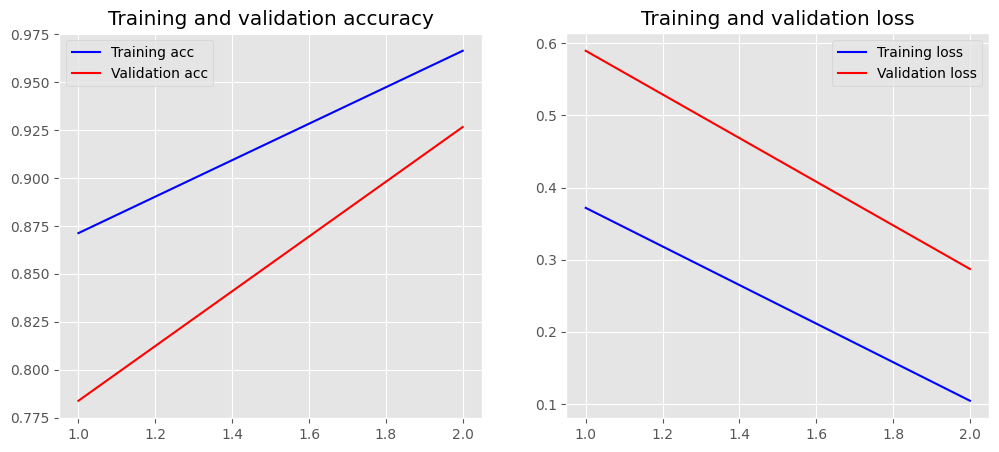

In [ ]:
plot_history(history)

In [ ]:
valid_pred=(custom_model.predict(valid_ds) > 0.5).astype("float32")

50/50 [==============================] - 13s 205ms/step


In [ ]:
tf.math.confusion_matrix(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[680,  50,   1],
       [ 58,   0,   0],
       [  2,   0,   0]], dtype=int32)>

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['ally', 'homophobic', 'transphobic']

In [ ]:
print(classification_report(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1), target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.93      0.92       731
  homophobic       0.00      0.00      0.00        58
 transphobic       0.00      0.00      0.00         2

    accuracy                           0.86       791
   macro avg       0.31      0.31      0.31       791
weighted avg       0.85      0.86      0.85       791



In [ ]:
report = classification_report(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1), target_names=target_names, output_dict=True)

In [ ]:
df_report = pd.DataFrame(report).transpose()

In [ ]:
df_report.to_csv('report2.csv')

# mBERT (Simple Transformers)

In [41]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [42]:
df_aug_shuffled.head()

,Unnamed: 0,text,category
0,0,destructive comprise method whatever it is aga...,1
1,1,it is not mental illness but it is genetic dis...,1
2,2,i think too gay thats y u telling with the ur ...,1
3,3,sister you are looking beauty pls dont spoil y...,1
4,4,Mic set Mind voice sothanigal 😂😂,0


In [43]:
df_dev.head()

,text,category
0,Govt must appoint a thiru nangai police to arr...,1
1,Archana Shree what,0
2,they probably dont want to live in your devan'...,0
3,Haha she is so cute and innocent,0
4,I love it 💗💗💗,0


In [103]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   1079 MiB |   6414 MiB |  13876 GiB |  13875 GiB |\n|       from large pool |   1078 MiB |   6412 MiB |  13769 GiB |  13768 GiB |\n|       from small pool |      0 MiB |     85 MiB |    106 GiB |    106 GiB |\n|---------------------------------------------------------------------------|\n| Active memory         |   1079 MiB |   6414 MiB |  13876 GiB |  13875 GiB |\n|       from large pool |   1078 MiB |   6412 MiB |

In [45]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 32,
             "eval_batch_size": 32,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5,
             "manual_seed": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [46]:
df_aug_shuffled=df_aug_shuffled[["text", "category"]]
df_aug_shuffled = df_aug_shuffled.rename(columns={'text': 'text', 'category': 'labels'})
df_aug_shuffled.head()

,text,labels
0,destructive comprise method whatever it is aga...,1
1,it is not mental illness but it is genetic dis...,1
2,i think too gay thats y u telling with the ur ...,1
3,sister you are looking beauty pls dont spoil y...,1
4,Mic set Mind voice sothanigal 😂😂,0


In [47]:
df_dev=df_dev[["text", "category"]]
df_dev = df_dev.rename(columns={'text': 'text', 'category': 'labels'})
df_dev.head()

,text,labels
0,Govt must appoint a thiru nangai police to arr...,1
1,Archana Shree what,0
2,they probably dont want to live in your devan'...,0
3,Haha she is so cute and innocent,0
4,I love it 💗💗💗,0


In [48]:
df_dev['labels'].value_counts()

0    731
1     58
2      2
Name: labels, dtype: int64

**De-emojification**

In [50]:
! pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=ddd080dddc0805d239f1585cee4b3eb998d16935bb21e48263a30ecf57aa5c0e
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [51]:
import emoji

In [52]:
df_aug_shuffled['text'] = df_aug_shuffled['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
df_dev['text'] = df_dev['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

**Remove punctuation**

In [53]:
df_dev.head(10)

,text,labels
0,Govt must appoint a thiru nangai police to arr...,1
1,Archana Shree what,0
2,they probably dont want to live in your devan'...,0
3,Haha she is so cute and innocent,0
4,I love it growing_heart growing_heart growi...,0
5,Such a caring guy smiling_face_with_heart-eyes...,0
6,madam malini....tell me which religion history...,0
7,The only wrong thing in this movie is harish's...,0
8,The best interview I have seen !!! Hugs Malini...,0
9,"great BRO, awaiting",0


**Spell Checking**

In [54]:
! pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.6 MB/s eta 0:00:00


In [55]:
from spellchecker import SpellChecker

In [56]:
spell = SpellChecker()

spell.word_frequency.load_words(['lgbt', 'lgbtq', 'lgbtqia+'])

In [57]:
# find those words that may be misspelled
misspelled = spell.unknown(["transgenderd"])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

transgender
{'transgender', 'transgendered'}


**Train model**

In [58]:
df_aug_shuffled['labels'].value_counts()

1    2826
0    1500
2     204
Name: labels, dtype: int64

In [59]:
# Train the model
model.train_model(df_aug_shuffled)

  0%|          | 0/4530 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/142 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/142 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/142 [00:00<?, ?it/s]

(426, 0.17539998120355021)

**Evaluate model**

In [60]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(df_dev, f1=f1_multiclass, acc=accuracy_score)

result

  0%|          | 0/791 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

{'mcc': 0.30619325833113553,
 'f1': 0.43654408457040034,
 'acc': 0.9165613147914032,
 'eval_loss': 0.3144284158945084}

In [ ]:
dev=df_dev['text'].tolist()
dev

In [62]:
predictions, raw_outputs = model.predict(dev)

  0%|          | 0/791 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
labels=df_dev['labels'].tolist()
labels

In [64]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.94      0.97      0.96       731
  homophobic       0.45      0.29      0.35        58
 transphobic       0.00      0.00      0.00         2

    accuracy                           0.92       791
   macro avg       0.46      0.42      0.44       791
weighted avg       0.90      0.92      0.91       791



In [65]:
tf.math.confusion_matrix(labels, predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[708,  21,   2],
       [ 41,  17,   0],
       [  2,   0,   0]], dtype=int32)>

**Test model**

In [66]:
df_test.describe

<bound method NDFrame.describe of                    category                       text                        
0    Non-anti-LGBT+ content  Spr....2016 poitan feel happy with my partner ...
1    Non-anti-LGBT+ content  R u still with ur partner                        
2    Non-anti-LGBT+ content  excellent movie..no unnecessary drama or scene...
3    Non-anti-LGBT+ content  For those who speak about culture., pre marita...
4    Non-anti-LGBT+ content  Best movie and people not understand relations...
..                      ...                                                ...
985  Non-anti-LGBT+ content  Looks like Karthik took advantage on Varun whe...
986  Non-anti-LGBT+ content  i am really crying pro😢😢😢😭😭😭😭😭😭               ...
987  Non-anti-LGBT+ content  They may be transgender but don't ever forgot ...
988  Non-anti-LGBT+ content  It is their own choice. I support them No doub...
989  Non-anti-LGBT+ content  Waited for a long time congrts team... such a ...

[990 rows x 2 col

In [81]:
df_test.rename(columns={'text                        ': 'text'}, inplace=True)

In [85]:
# pre-process test dataset before making predictions
test_list=df_test['text'].tolist()
df_test['text'] = df_test['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
test_list_preprocessed=df_test['text'].tolist()

In [ ]:
test_list[:10]

In [ ]:
test_list_preprocessed[:10]

In [88]:
predictions_test, raw_outputs = model.predict(test_list_preprocessed)

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [89]:
data_final_english = {'category':predictions_test,
        'text':test_list}

df_final_english = pd.DataFrame(data_final_english)

df_final_english

,category,text
0,0,Spr....2016 poitan feel happy with my partner ...
1,0,R u still with ur partner
2,0,excellent movie..no unnecessary drama or scene...
3,0,"For those who speak about culture., pre marita..."
4,0,Best movie and people not understand relations...
...,...,...
985,0,Looks like Karthik took advantage on Varun whe...
986,0,i am really crying pro crying_face crying_fac...
987,0,They may be transgender but don't ever forgot ...
988,0,It is their own choice. I support them No doub...


In [90]:
df_final_english['category'] = df_final_english['category'].replace(0, 'Non-anti-LGBT+ content')
df_final_english['category'] = df_final_english['category'].replace(1, 'Homophobic')
df_final_english['category'] = df_final_english['category'].replace(2, 'Transphobic')

In [91]:
df_final_english.drop(df_final_english.tail(9).index,inplace = True)

In [92]:
df_final_english['category'].value_counts()

Non-anti-LGBT+ content    930
Homophobic                 48
Transphobic                 3
Name: category, dtype: int64

##XLM roBERTa english

In [96]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 16,
             "eval_batch_size": 16,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5}

# Create a ClassificationModel
model = ClassificationModel(
    "xlmroberta", "xlm-roberta-base",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:486: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  warnings.warn(


In [97]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  17536 KiB |   5226 MiB |   6036 GiB |   6036 GiB |\n|       from large pool |  17536 KiB |   5223 MiB |   5997 GiB |   5997 GiB |\n|       from small pool |      0 KiB |      3 MiB |     38 GiB |     38 GiB |\n|---------------------------------------------------------------------------|\n| Active memory         |  17536 KiB |   5226 MiB |   6036 GiB |   6036 GiB |\n|       from large pool |  17536 KiB |   5223 MiB |

In [98]:
# Train the model
model.train_model(df_aug_shuffled)

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/284 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/284 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/284 [00:00<?, ?it/s]

(852, 0.25754306095044516)

In [99]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(df_dev, f1=f1_multiclass, acc=accuracy_score)

result

  0%|          | 0/791 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

{'mcc': 0.40265364404179527,
 'f1': 0.4746999559286249,
 'acc': 0.9178255372945638,
 'eval_loss': 0.35169317208230494}

In [ ]:
dev=df_dev['text'].tolist()
dev

In [ ]:
labels=df_dev['labels'].tolist()
labels

In [102]:

from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.94      0.97      0.96       731
  homophobic       0.45      0.29      0.35        58
 transphobic       0.00      0.00      0.00         2

    accuracy                           0.92       791
   macro avg       0.46      0.42      0.44       791
weighted avg       0.90      0.92      0.91       791



# Tamil with mBERT

In [104]:
tam_df=pd.read_csv('/content/tam_3_train.tsv', delimiter='\t') 
tam_df=tam_df[["text", "category"]]
tam_df = tam_df.dropna()
tam_df

,text,category
0,அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒ...,Transphobic
1,section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்...,Non-anti-LGBT+ content
2,இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு ச...,Transphobic
3,Shanth sha உடலுறவு இனப்பெருக்கத்திற்கு மட்டும...,Non-anti-LGBT+ content
4,ஜீவநதி ப்ரியன் hi,Non-anti-LGBT+ content
...,...,...
2657,நீங்கள் என்னதான் சட்டம் கொண்டுவந்தாலும் இது தவ...,Homophobic
2658,Ayy Ar இதய துடிப்பில் உனது நினைவலைகள். ஊன் உற...,Non-anti-LGBT+ content
2659,இவர்கள் இவ்வளவு பண்ணிவிட்டு எங்களை சமுதாயம் மத...,Non-anti-LGBT+ content
2660,ப்ரோ அவங்களுக்கு.திருநங்கைகள் தான் இவங்க.கட்டப...,Non-anti-LGBT+ content


In [105]:
tam_df_dev=pd.read_csv('/content/tam_3_dev.tsv', delimiter='\t') 
tam_df_dev=tam_df_dev[["text", "category"]]
tam_df_dev = tam_df_dev.dropna()
tam_df_dev

,text,category
0,Blue Lilly u can even consider me as an athei...,Non-anti-LGBT+ content
1,"திருநங்கை நல்ல மனசு கொண்டவர்கள்... , நீங்கள் க...",Non-anti-LGBT+ content
2,மொதல்ல தமிழ் மொழியை கேவல படுத்தாத.,Non-anti-LGBT+ content
3,கவலைப்படாதே.உன்.குடும்பத்தில் கண்டிப்பா.ஒரு தி...,Non-anti-LGBT+ content
4,துலுக்க நாடுகள்ல தான் ஓரிணசேர்க்கை அதிகமா ஓரிண...,Homophobic
...,...,...
661,"நீங்க பேசினது எல்லாம் உண்மை அக்கா, எனக்கு ஒரு ...",Non-anti-LGBT+ content
662,இதே கேள்விய கிராமத்தில போய் கேட்டு பாருங்க.......,Non-anti-LGBT+ content
663,Sumitha Stalinbabu nee ஆம்பலயா இல்ல பொட்ட யா?,Transphobic
664,இந்த மாதிரி ஆபாசமா அநாகரீகமா ரவுடித்தனம் பண்ற ...,Non-anti-LGBT+ content


In [122]:
tam_df_test=pd.read_csv('/content/tam_3_test.tsv', delimiter='\t') 
tam_df_test=tam_df_test[["text", "category"]]
tam_df_test = tam_df_test.dropna()
tam_df_test

,text,category
0,ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.,Non-anti-LGBT+ content
1,தம்பி வாழ்க வளமுடன் 💐👌👌👌,Non-anti-LGBT+ content
2,ஏசுவே துனை சகேதரி,Non-anti-LGBT+ content
3,கண் கலங்கி விட்டது.........,Non-anti-LGBT+ content
4,எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean ...,Non-anti-LGBT+ content
...,...,...
828,"அழகான தமிழில் அழகான உச்சரிப்போடு, சிரித்த முகத...",Non-anti-LGBT+ content
829,ரயில்வே போலீஸ்!!,Non-anti-LGBT+ content
830,Siva Siva என்னது?,Non-anti-LGBT+ content
831,அந்த சகோதரி அம்மா,Non-anti-LGBT+ content


In [106]:
tam_df['category'] = tam_df['category'].replace('Non-anti-LGBT+ content', 'ally')
tam_df_dev['category'] = tam_df_dev['category'].replace('Non-anti-LGBT+ content', 'ally')

In [107]:

tam_df['category'] = tam_df['category'].replace('ally', 0)
tam_df_dev['category'] = tam_df_dev['category'].replace('ally', 0)
tam_df['category'] = tam_df['category'].replace('Homophobic', 1)
tam_df_dev['category'] = tam_df_dev['category'].replace('Homophobic', 1)

tam_df['category'] = tam_df['category'].replace('Transphobic', 2)
tam_df_dev['category'] = tam_df_dev['category'].replace('Transphobic', 2)

In [108]:
tam_df=tam_df[["text", "category"]]
tam_df = tam_df.rename(columns={'text': 'text', 'category': 'labels'})
print(tam_df.head())

tam_df_dev=tam_df_dev[["text", "category"]]
tam_df_dev = tam_df_dev.rename(columns={'text': 'text', 'category': 'labels'})
print(tam_df_dev.head())

                                                text  labels
0  அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒ...       2
1  section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்...       0
2  இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு ச...       2
3  Shanth sha  உடலுறவு இனப்பெருக்கத்திற்கு மட்டும...       0
4                                 ஜீவநதி ப்ரியன்  hi       0
                                                text  labels
0  Blue Lilly  u can even consider me as an athei...       0
1  திருநங்கை நல்ல மனசு கொண்டவர்கள்... , நீங்கள் க...       0
2                 மொதல்ல தமிழ் மொழியை கேவல படுத்தாத.       0
3  கவலைப்படாதே.உன்.குடும்பத்தில் கண்டிப்பா.ஒரு தி...       0
4  துலுக்க நாடுகள்ல தான் ஓரிணசேர்க்கை அதிகமா ஓரிண...       1


In [109]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 32,
             "eval_batch_size": 32,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5,
             "manual_seed": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [110]:
tam_df.head(10)

,text,labels
0,அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒ...,2
1,section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்...,0
2,இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு ச...,2
3,Shanth sha உடலுறவு இனப்பெருக்கத்திற்கு மட்டும...,0
4,ஜீவநதி ப்ரியன் hi,0
5,இவளயெல்லாம் நாட்டில விட்டு வைப்பதே மிக தவறு ...,1
6,ஆமா அண்ணா சரியா சொன்னீங்க govarnmend வேலை குடு...,0
7,Thirumalai Nambirajan Perumal சுண்ணி நீ சிந்ச...,0
8,பண்றது டிச்சிங் டிச்சிங். இதுல நியாய மயிறு வேற...,1
9,முதல்ல இங்க பேட்டி கொடுக்குற பிராணி ஆனா பெண்ணா...,1


In [111]:
tam_df['text'] = tam_df['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
tam_df_dev['text'] = tam_df_dev['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

In [112]:
tam_df.head(10)

,text,labels
0,அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒ...,2
1,section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்...,0
2,இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு ச...,2
3,Shanth sha உடலுறவு இனப்பெருக்கத்திற்கு மட்டும...,0
4,ஜீவநதி ப்ரியன் hi,0
5,இவளயெல்லாம் நாட்டில விட்டு வைப்பதே மிக தவறு ...,1
6,ஆமா அண்ணா சரியா சொன்னீங்க govarnmend வேலை குடு...,0
7,Thirumalai Nambirajan Perumal சுண்ணி நீ சிந்ச...,0
8,பண்றது டிச்சிங் டிச்சிங். இதுல நியாய மயிறு வேற...,1
9,முதல்ல இங்க பேட்டி கொடுக்குற பிராணி ஆனா பெண்ணா...,1


In [113]:
# Train the model
model.train_model(tam_df)

  0%|          | 0/2655 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/83 [00:00<?, ?it/s]

(249, 0.5315460147986929)

In [114]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(tam_df_dev, f1=f1_multiclass, acc=accuracy_score)

result

  0%|          | 0/665 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/21 [00:00<?, ?it/s]

{'mcc': 0.6022400933968437,
 'f1': 0.7139175046287765,
 'acc': 0.8631578947368421,
 'eval_loss': 0.3787399885200319}

In [115]:
tam_dev=tam_df_dev['text'].tolist()
tam_dev[:5]

['Blue Lilly\xa0 u can even consider me as an atheist... so plzzz மதம் ரீதியாக அ\u200cல்லது மார்கம் ரீதியாக பேசவேண்டாம்...',
 'திருநங்கை நல்ல மனசு கொண்டவர்கள்... , நீங்கள் கடைசியாக இல்லாதவங்களுக்கு சாப்பாடு கொடுத்து சூப்பர் நண்பா thumbs_up ',
 'மொதல்ல தமிழ் மொழியை கேவல படுத்தாத.',
 'கவலைப்படாதே.உன்.குடும்பத்தில் கண்டிப்பா.ஒரு திருநங்கை.பிறக்கும் டா',
 'துலுக்க நாடுகள்ல தான் ஓரிணசேர்க்கை அதிகமா ஓரிணசேர்க்கைல ஈடு படுரானுக துலுக்கன் சூத்துல ஓக்குறத தான் அதிகம் விரும்புவான் முகமது நபி கூட ஒரு ஓரிணசேர்க்கையாளன் தான்.']

In [116]:
tam_predictions, tam_raw_outputs = model.predict(tam_dev)

  0%|          | 0/665 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

In [117]:
tam_labels=tam_df_dev['labels'].tolist()
tam_labels[:5]

[0, 0, 0, 0, 1]

In [118]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(tam_labels, tam_predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.92      0.92       526
  homophobic       0.63      0.71      0.67       103
 transphobic       0.73      0.44      0.55        36

    accuracy                           0.86       665
   macro avg       0.76      0.69      0.71       665
weighted avg       0.86      0.86      0.86       665



In [119]:
tf.math.confusion_matrix(tam_labels, tam_predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[485,  35,   6],
       [ 30,  73,   0],
       [ 13,   7,  16]], dtype=int32)>

**Test model**

In [123]:
tam_df_test.describe

<bound method NDFrame.describe of                                                   text                category
0            ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.  Non-anti-LGBT+ content
1                             தம்பி வாழ்க வளமுடன் 💐👌👌👌  Non-anti-LGBT+ content
2                                    ஏசுவே துனை சகேதரி  Non-anti-LGBT+ content
3                          கண் கலங்கி விட்டது.........  Non-anti-LGBT+ content
4    எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean ...  Non-anti-LGBT+ content
..                                                 ...                     ...
828  அழகான தமிழில் அழகான உச்சரிப்போடு, சிரித்த முகத...  Non-anti-LGBT+ content
829                                   ரயில்வே போலீஸ்!!  Non-anti-LGBT+ content
830                                 Siva Siva  என்னது?  Non-anti-LGBT+ content
831                                அந்த சகோதரி  அம்மா  Non-anti-LGBT+ content
832  ஏண்டா புண்ட திருநங்கை தப்பா சொல்லுரிங்ஙளே அவுங...  Non-anti-LGBT+ content

[829 rows x 2 col

In [124]:
# pre-process test dataset before making predictions
tam_test_list=tam_df_test['text'].tolist()

# de-emojification
tam_df_test['text'] = tam_df_test['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

# list after pre-processing
tam_test_list_preprocessed=tam_df_test['text'].tolist()

In [125]:
tam_test_list[:10]

['ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.',
 'தம்பி வாழ்க வளமுடன் 💐👌👌👌',
 'ஏசுவே துனை சகேதரி',
 'கண் கலங்கி விட்டது.........',
 "எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean not sex it's காதல்  also அதை புரிந்து கொள்ளுங்கள் காதல்  செய்யுங்கள் but don't time pass",
 'இதே போல எல்லா விசயத்திலேயும் தனி மனித விருப்பத்துக்கு ஏற்ப சட்டம் வரனும்..',
 'தேவன் நிச்சயம் சந்திப்பார் 🙏',
 'Gay ah பொறந்து அவங்க தப்பு இல்லை...அது ஆண்டவணின் திருவிளையாட்டால் உருவாக்கப்பட்ட ஒன்று... அதாவது ஹார்மோன் மாறுபாட்டால் ஏற்படுகிறது... ஆனால் சிலர் இயற்கைக்கு மாறானது என்கிறார்கள் அது தவறு... ஏனென்றால் ஆண்டவனால் உருவாக்கப்பட்ட அனைத்தும் இயற்கை தானே அப்படியென்றால் இதுவும் இயற்கை தான்... உண்மையான காதல் என்பது யார் மீது வேண்டுமானாலும் வரலாம்...அதற்கு சாதி,மதம்,ஆண்,பெண் என்று எதுவும் கிடையாது...இந்த உலகத்துல எவனும் கலாச்சாரத்த முறையாக பின்பற்றுவதில்லை இதுவே உண்மை...ஆகையால் ஓரினச்சேர்க்கை என்பது தவறில்லை அவரவர் மனதிற்கு பிடித்த வாழ்க்கையை வாழ்கிறார்கள்... ஏதாவது ஒரு மரம் வித்தியாசமாக இருந்தால் அதனை கடவுள் வணங்குகிறீர்

In [126]:
tam_test_list_preprocessed[:10]

['ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.',
 'தம்பி வாழ்க வளமுடன்  bouquet  OK_hand  OK_hand  OK_hand ',
 'ஏசுவே துனை சகேதரி',
 'கண் கலங்கி விட்டது.........',
 "எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean not sex it's காதல்  also அதை புரிந்து கொள்ளுங்கள் காதல்  செய்யுங்கள் but don't time pass",
 'இதே போல எல்லா விசயத்திலேயும் தனி மனித விருப்பத்துக்கு ஏற்ப சட்டம் வரனும்..',
 'தேவன் நிச்சயம் சந்திப்பார்  folded_hands ',
 'Gay ah பொறந்து அவங்க தப்பு இல்லை...அது ஆண்டவணின் திருவிளையாட்டால் உருவாக்கப்பட்ட ஒன்று... அதாவது ஹார்மோன் மாறுபாட்டால் ஏற்படுகிறது... ஆனால் சிலர் இயற்கைக்கு மாறானது என்கிறார்கள் அது தவறு... ஏனென்றால் ஆண்டவனால் உருவாக்கப்பட்ட அனைத்தும் இயற்கை தானே அப்படியென்றால் இதுவும் இயற்கை தான்... உண்மையான காதல் என்பது யார் மீது வேண்டுமானாலும் வரலாம்...அதற்கு சாதி,மதம்,ஆண்,பெண் என்று எதுவும் கிடையாது...இந்த உலகத்துல எவனும் கலாச்சாரத்த முறையாக பின்பற்றுவதில்லை இதுவே உண்மை...ஆகையால் ஓரினச்சேர்க்கை என்பது தவறில்லை அவரவர் மனதிற்கு பிடித்த வாழ்க்கையை வாழ்கிறார்கள்... ஏதாவது ஒரு மரம் வி

In [127]:
tam_predictions_test, tam_raw_outputs = model.predict(tam_test_list_preprocessed)

  0%|          | 0/829 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

In [128]:
data_final_tamil = {'category':tam_predictions_test,
        'text':tam_test_list}

df_final_tamil = pd.DataFrame(data_final_tamil)

df_final_tamil

,category,text
0,0,ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.
1,0,தம்பி வாழ்க வளமுடன் 💐👌👌👌
2,0,ஏசுவே துனை சகேதரி
3,0,கண் கலங்கி விட்டது.........
4,0,எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean ...
...,...,...
824,0,"அழகான தமிழில் அழகான உச்சரிப்போடு, சிரித்த முகத..."
825,0,ரயில்வே போலீஸ்!!
826,0,Siva Siva என்னது?
827,0,அந்த சகோதரி அம்மா


In [129]:
df_final_tamil['category'] = df_final_tamil['category'].replace(0, 'Non-anti-LGBT+ content')

df_final_tamil['category'] = df_final_tamil['category'].replace(1, 'Homophobic')

df_final_tamil['category'] = df_final_tamil['category'].replace(2, 'Transphobic')

In [130]:
df_final_tamil['category'].value_counts()

Non-anti-LGBT+ content    665
Homophobic                140
Transphobic                24
Name: category, dtype: int64

# Tamil with XLM roBERTa

In [131]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 16,
             "eval_batch_size": 16,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5}

# Create a ClassificationModel
model = ClassificationModel(
    "xlmroberta", "xlm-roberta-base",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

In [132]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  17536 KiB |   6414 MiB |  17496 GiB |  17496 GiB |\n|       from large pool |  17536 KiB |   6412 MiB |  17365 GiB |  17365 GiB |\n|       from small pool |      0 KiB |     85 MiB |    130 GiB |    130 GiB |\n|---------------------------------------------------------------------------|\n| Active memory         |  17536 KiB |   6414 MiB |  17496 GiB |  17496 GiB |\n|       from large pool |  17536 KiB |   6412 MiB |

In [133]:
# Train the model
model.train_model(tam_df)

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/166 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/166 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/166 [00:00<?, ?it/s]

(498, 0.5676198358606382)

In [134]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(tam_df_dev, f1=f1_multiclass, acc=accuracy_score)

result

  0%|          | 0/665 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/42 [00:00<?, ?it/s]

{'mcc': 0.4825697757711994,
 'f1': 0.48940127053092386,
 'acc': 0.8285714285714286,
 'eval_loss': 0.3928185156768277}

In [135]:
predictions=np.argmax(model_outputs, axis=1)
print(len(predictions))
print(predictions)

665
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 

In [136]:
bert_val_lbl=[]
for i, sequence in enumerate(tam_df_dev['labels']):
  bert_val_lbl.append( sequence )
print(len(bert_val_lbl))
print(bert_val_lbl)

665
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [137]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(bert_val_lbl, predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.90      0.93      0.92       526
  homophobic       0.50      0.61      0.55       103
 transphobic       0.00      0.00      0.00        36

    accuracy                           0.83       665
   macro avg       0.47      0.51      0.49       665
weighted avg       0.79      0.83      0.81       665



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
tf.math.confusion_matrix(bert_val_lbl, predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[488,  38,   0],
       [ 40,  63,   0],
       [ 12,  24,   0]], dtype=int32)>

# Tamil with IndicBERT

In [139]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   1079 MiB |   6414 MiB |  22116 GiB |  22115 GiB |\n|       from large pool |   1078 MiB |   6412 MiB |  21945 GiB |  21944 GiB |\n|       from small pool |      0 MiB |     85 MiB |    171 GiB |    171 GiB |\n|---------------------------------------------------------------------------|\n| Active memory         |   1079 MiB |   6414 MiB |  22116 GiB |  22115 GiB |\n|       from large pool |   1078 MiB |   6412 MiB |

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 16,
             "eval_batch_size": 16,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5}

# Create a ClassificationModel
model = ClassificationModel(
    "albert", "ai4bharat/indic-bert",
    num_labels=3,
    args=train_args
)
    

In [ ]:
# Train the model
model.train_model(tam_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/2662 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_albert_128_3_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of albert model complete. Saved to outputs/.


(501, 0.5416278333929246)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(tam_df_dev, f1=f1_multiclass, acc=accuracy_score)

result

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/666 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_albert_128_3_2


Running Evaluation:   0%|          | 0/42 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.4040073330633772, 'f1': 0.4680119581464873, 'acc': 0.8243243243243243, 'eval_loss': 0.43238538024680956}


{'acc': 0.8243243243243243,
 'eval_loss': 0.43238538024680956,
 'f1': 0.4680119581464873,
 'mcc': 0.4040073330633772}

In [ ]:
predictions=np.argmax(model_outputs, axis=1)
print(len(predictions))
print(predictions)

666
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 

In [ ]:
bert_val_lbl=[]
for i, sequence in enumerate(tam_df_dev['labels']):
  bert_val_lbl.append( sequence )
print(len(bert_val_lbl))
print(bert_val_lbl)

666
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(bert_val_lbl, predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.86      0.96      0.90       526
  homophobic       0.58      0.44      0.50       103
 transphobic       0.00      0.00      0.00        37

    accuracy                           0.82       666
   macro avg       0.48      0.47      0.47       666
weighted avg       0.77      0.82      0.79       666



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tf.math.confusion_matrix(bert_val_lbl, predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[504,  22,   0],
       [ 58,  45,   0],
       [ 27,  10,   0]], dtype=int32)>

# CodeMix with mBERT

In [143]:
import pandas as pd

In [147]:
df_mix_train=pd.read_csv('/content/eng-tam_3_train.tsv', delimiter='\t')
df_mix_train.head()

,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Homophobic,@Kadhayalla Nijam thaa gay Punda Apo ne confi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Non-anti-LGBT+ content,love you too Nanba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Non-anti-LGBT+ content,Semma super 👍👍👍👍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Non-anti-LGBT+ content,Ava ka elom kadavuluka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Non-anti-LGBT+ content,Bro gay persons kalyanam panninaa kozhanda pet...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df_mix_train=df_mix_train[["category", "text"]]
df_mix_train.describe()

,category,text
count,3861,3861
unique,3,3827
top,Non-anti-LGBT+ content,I am waiting
freq,3438,6


In [152]:
df_mix_train["category"].value_counts()

Non-anti-LGBT+ content    3438
Homophobic                 311
Transphobic                112
Name: category, dtype: int64

In [155]:
df_mix_dev=pd.read_csv('/content/eng-tam_3_dev.tsv', delimiter='\t')
df_mix_dev.head()

,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Non-anti-LGBT+ content,Na 11th padikra apo school uniform la en p** p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Non-anti-LGBT+ content,supr bro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Non-anti-LGBT+ content,Such a beautiful movie 🖤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Non-anti-LGBT+ content,Un num send pandri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Non-anti-LGBT+ content,ivangalaa police la pidichikodukanum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df_mix_dev=df_mix_dev[["category", "text"]]
df_mix_dev.describe()

,category,text
count,966,965
unique,3,962
top,Non-anti-LGBT+ content,Antha manasu than sir kadavul
freq,862,2


In [157]:
df_mix_dev["category"].value_counts()

Non-anti-LGBT+ content    862
Homophobic                 66
Transphobic                38
Name: category, dtype: int64

In [159]:
df_mix_test=pd.read_csv('/content/eng_tam_3_test.tsv', delimiter='\t')
df_mix_test.head()

,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Non-anti-LGBT+ content,Ivlo therinjum kadaisi la saga manushana dead ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Non-anti-LGBT+ content,Neenga gay va,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Non-anti-LGBT+ content,3.42 sec ultimate 🤣🤣🤣🤣🤣,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Non-anti-LGBT+ content,Bro endha oru nega soluga bro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Non-anti-LGBT+ content,Super Anda akkavukku enathu anbarntha vaalthuk...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df_mix_test=df_mix_test[[ "text"]]
df_mix_test.describe()

,text
count,1207
unique,1203
top,Vera level bro
freq,3


In [161]:
df_mix_train=df_mix_train[["text", "category"]]
df_mix_train = df_mix_train.rename(columns={'text': 'text', 'category': 'labels'})
print(df_mix_train.head())

df_mix_dev=df_mix_dev[["text", "category"]]
df_mix_dev = df_mix_dev.rename(columns={'text': 'text', 'category': 'labels'})
print(df_mix_dev.head())

                                                text                  labels
0  @Kadhayalla Nijam  thaa gay Punda Apo ne confi...              Homophobic
1                                love you  too Nanba  Non-anti-LGBT+ content
2                                   Semma super 👍👍👍👍  Non-anti-LGBT+ content
3                             Ava ka elom kadavuluka  Non-anti-LGBT+ content
4  Bro gay persons kalyanam panninaa kozhanda pet...  Non-anti-LGBT+ content
                                                text                  labels
0  Na 11th padikra apo school uniform la en p** p...  Non-anti-LGBT+ content
1                                          supr  bro  Non-anti-LGBT+ content
2                           Such a beautiful movie 🖤  Non-anti-LGBT+ content
3                                 Un num send pandri  Non-anti-LGBT+ content
4           ivangalaa   police la   pidichikodukanum  Non-anti-LGBT+ content


In [162]:
df_mix_train['labels'] = df_mix_train['labels'].replace('Non-anti-LGBT+ content', 0)
df_mix_dev['labels'] = df_mix_dev['labels'].replace('Non-anti-LGBT+ content', 0)

df_mix_train['labels'] = df_mix_train['labels'].replace('Homophobic', 1)
df_mix_dev['labels'] = df_mix_dev['labels'].replace('Homophobic', 1)

df_mix_train['labels'] = df_mix_train['labels'].replace('Transphobic', 2)
df_mix_dev['labels'] = df_mix_dev['labels'].replace('Transphobic', 2)

In [163]:
df_mix_train['text'] = df_mix_train['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
  #df_mix_dev['text'] =   df_mix_dev['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

In [164]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 5,
             "max_seq_length": 128,
             "train_batch_size": 32,
             "eval_batch_size": 32,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 3e-5,
             "manual_seed": 4}

# Create a ClassificationModel
model_mbert = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:
# Train the model
model_mbert.train_model(df_mix_train)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/3861 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_3_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(605, 0.2626297708750849)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result_mbert, model_outputs_mbert, wrong_predictions_mbert = model_mbert.eval_model(df_mix_dev, f1=f1_multiclass, acc=accuracy_score)

result_mbert

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_3_2


Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.3452032313227783, 'f1': 0.5354497674471065, 'acc': 0.8674948240165632, 'eval_loss': 0.4764923366808122}


{'acc': 0.8674948240165632,
 'eval_loss': 0.4764923366808122,
 'f1': 0.5354497674471065,
 'mcc': 0.3452032313227783}

In [ ]:
df_mix_dev['text'].fillna("",inplace=True)
df_mix_devlist=df_mix_dev['text'].tolist()
df_mix_devlist[:5]

['Na 11th padikra apo school uniform la en p** pidichi amukinanga kootathula',
 'supr  bro',
 'Such a beautiful movie 🖤',
 'Un num send pandri',
 'ivangalaa   police la   pidichikodukanum']

In [ ]:
mix_predictions, mix_raw_outputs = model_mbert.predict(df_mix_devlist)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
mix_labels=df_mix_dev['labels'].tolist()
mix_labels[:5]


[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(mix_labels, mix_predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.94      0.93      0.94       862
  homophobic       0.25      0.38      0.30        66
 transphobic       0.82      0.24      0.37        38

    accuracy                           0.87       966
   macro avg       0.67      0.52      0.54       966
weighted avg       0.89      0.87      0.87       966



In [ ]:
import tensorflow as tf
tf.math.confusion_matrix(mix_labels, mix_predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[819,  43,   0],
       [ 47,  19,   0],
       [ 17,  21,   0]], dtype=int32)>

In [ ]:
df_mix_test.describe

<bound method NDFrame.describe of                                                    text
0     Ivlo therinjum kadaisi la saga manushana dead ...
1                                         Neenga gay va
2                               3.42 sec ultimate 🤣🤣🤣🤣🤣
3                         Bro endha oru nega soluga bro
4     Super Anda akkavukku enathu anbarntha vaalthuk...
...                                                 ...
1202                               Akka pls hi sollunga
1203   rompa azhagana devathai mathiri irukinga neenga.
1204  Ore aalu avan ellaathaium ethirkiraan, paravaa...
1205  Serupu.. Otha sex na enanu therichikitu pesuda...
1206  Mein ha beach la idhunga thola thangave mudiya...

[1207 rows x 1 columns]>

In [ ]:

# pre-process test dataset before making predictions
df_mix_test_list=df_mix_test['text'].tolist()

# de-emojification
df_mix_test['text'] = df_mix_test['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

# list after pre-processing
df_mix_test_list_preprocessed=df_mix_test['text'].tolist()

In [ ]:
df_mix_test_list[:10]

['Ivlo therinjum kadaisi la saga manushana dead body koodayum animals koodayum compare panniteenga! 👌👌 Arumai ji!',
 'Neenga gay va',
 '3.42 sec ultimate 🤣🤣🤣🤣🤣',
 'Bro endha oru nega soluga bro',
 'Super Anda akkavukku enathu anbarntha vaalthukkal thirunangai vaalga 🙏🙏🙏',
 'Aluthuta da thambi😭😭😭😭',
 'I want permanent lifepartner',
 'Yogesh Waran Hey nee 9 taane 😜😆',
 'Kolai Seibavan Kooda avanukku oru niyayam vaithiruppaan. Adhanaal avan seivadhu sari illai.',
 'I love you akka']

In [ ]:
df_mix_test_list_preprocessed[:10]

['Ivlo therinjum kadaisi la saga manushana dead body koodayum animals koodayum compare panniteenga!  OK_hand  OK_hand  Arumai ji!',
 'Neenga gay va',
 '3.42 sec ultimate  rolling_on_the_floor_laughing  rolling_on_the_floor_laughing  rolling_on_the_floor_laughing  rolling_on_the_floor_laughing  rolling_on_the_floor_laughing ',
 'Bro endha oru nega soluga bro',
 'Super Anda akkavukku enathu anbarntha vaalthukkal thirunangai vaalga  folded_hands  folded_hands  folded_hands ',
 'Aluthuta da thambi loudly_crying_face  loudly_crying_face  loudly_crying_face  loudly_crying_face ',
 'I want permanent lifepartner',
 'Yogesh Waran Hey nee 9 taane  winking_face_with_tongue  grinning_squinting_face ',
 'Kolai Seibavan Kooda avanukku oru niyayam vaithiruppaan. Adhanaal avan seivadhu sari illai.',
 'I love you akka']

In [ ]:
mix_predictions_test, mix_raw_outputs = model.predict(df_mix_test_list_preprocessed)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:

data_final_mix = {'category':mix_predictions_test,
        'text':df_mix_test_list}

df_final_mix = pd.DataFrame(data_final_mix)

df_final_mix

,category,text
0,0,Ivlo therinjum kadaisi la saga manushana dead ...
1,1,Neenga gay va
2,0,3.42 sec ultimate 🤣🤣🤣🤣🤣
3,0,Bro endha oru nega soluga bro
4,0,Super Anda akkavukku enathu anbarntha vaalthuk...
...,...,...
1202,0,Akka pls hi sollunga
1203,0,rompa azhagana devathai mathiri irukinga neenga.
1204,0,"Ore aalu avan ellaathaium ethirkiraan, paravaa..."
1205,1,Serupu.. Otha sex na enanu therichikitu pesuda...


In [ ]:
df_final_mix['category'] = df_final_mix['category'].replace(0, 'Non-anti-LGBT+ content')

df_final_mix['category'] = df_final_mix['category'].replace(1, 'Homophobic')

df_final_mix['category'] = df_final_mix['category'].replace(2, 'Transphobic')

In [ ]:
# saving as tsv file
df_final_mix.to_csv('final_mix.tsv', sep="\t", index=False)

# CodeMix with XLM roBERTa

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 5,
             "max_seq_length": 128,
             "train_batch_size": 32,
             "eval_batch_size": 32,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 3e-5,
             "manual_seed": 4}

# Create a ClassificationModel
model_xlmroberta = ClassificationModel(
    "xlmroberta", "xlm-roberta-base",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

In [ ]:
# Train the model
model_xlmroberta.train_model(df_mix_train)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_xlmroberta_128_3_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of xlmroberta model complete. Saved to outputs/.


(605, 0.35886286597483413)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result_xlmroberta, model_outputs_xlmroberta, wrong_predictions_xlmroberta = model_xlmroberta.eval_model(df_mix_dev, f1=f1_multiclass, acc=accuracy_score)

result_xlmroberta

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_xlmroberta_128_3_2


Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.27172582185796623, 'f1': 0.4146611204648245, 'acc': 0.8757763975155279, 'eval_loss': 0.3761742717075732}


{'acc': 0.8757763975155279,
 'eval_loss': 0.3761742717075732,
 'f1': 0.4146611204648245,
 'mcc': 0.27172582185796623}

In [ ]:
df_mix_dev['text'].fillna("",inplace=True)
df_mix_devlist=df_mix_dev['text'].tolist()
df_mix_devlist[:5]

['Na 11th padikra apo school uniform la en p** pidichi amukinanga kootathula',
 'supr  bro',
 'Such a beautiful movie 🖤',
 'Un num send pandri',
 'ivangalaa   police la   pidichikodukanum']

In [ ]:
mix_predictions, mix_raw_outputs = model_xlmroberta.predict(df_mix_devlist)


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
mix_labels=df_mix_dev['labels'].tolist()
mix_labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(mix_labels, mix_predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.96      0.94       862
  homophobic       0.29      0.32      0.30        66
 transphobic       0.00      0.00      0.00        38

    accuracy                           0.88       966
   macro avg       0.40      0.43      0.41       966
weighted avg       0.84      0.88      0.86       966



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **CodeMix with IndicBERT**

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 5,
             "max_seq_length": 128,
             "train_batch_size": 16,
             "eval_batch_size": 16,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 3e-5}

# Create a ClassificationModel
model_indic = ClassificationModel(
    "albert", "ai4bharat/indic-bert",
    num_labels=3,
    args=train_args
)

In [ ]:
# Train the model
model_indic.train_model(df_mix_train)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/3861 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_albert_128_3_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of albert model complete. Saved to outputs/.


(1210, 0.36289413608225785)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result_indic, model_outputs_indic, wrong_predictions_indic = model_indic.eval_model(df_mix_dev, f1=f1_multiclass, acc=accuracy_score)

result_indic

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_albert_128_3_2


Running Evaluation:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.25844945444884326, 'f1': 0.39732650739476677, 'acc': 0.8747412008281573, 'eval_loss': 0.34613672915662896}


{'acc': 0.8747412008281573,
 'eval_loss': 0.34613672915662896,
 'f1': 0.39732650739476677,
 'mcc': 0.25844945444884326}

In [ ]:
mix_predictions_indic, mix_raw_outputs_indic = model_indic.predict(df_mix_devlist)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(mix_labels, mix_predictions_indic, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.96      0.94       862
  homophobic       0.24      0.26      0.25        66
 transphobic       0.00      0.00      0.00        38

    accuracy                           0.87       966
   macro avg       0.39      0.41      0.40       966
weighted avg       0.84      0.87      0.86       966



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
